# A. QUESTION OR DECISION

Which features or attributes contribute to a customer opting out of a network provider's service?

In [1]:
#Import all the libraries necessary to this research

# Statistical Analysis library
import scipy.stats as stats

#Data Preparation and Analysis Libraries
import pandas as pd
import numpy as np

#Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Dimensionality Reduction Library
from sklearn.decomposition import PCA

In [2]:
# Load the churn raw data set and display the first few rows

churn_data = pd.read_csv('churn_raw_data.csv')
pd.options.display.max_columns = None
churn_data.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,NaN,68.0,Master's Degree,Part Time,28561.99,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1.0,27.0,Regular High School Diploma,Retired,21704.77,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4.0,50.0,Regular High School Diploma,Student,NaN,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1.0,48.0,Doctorate Degree,Retired,18925.23,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0.0,83.0,Master's Degree,Student,40074.19,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5


# 





# B. DESCRIBE REQUIRED VARIABLES
The dataset imported above contains 52 variables. These attributes, their description, and examples are mentioned in the table below:

**DATA TYPE**  |**DESCRIPTION** |**EXAMPLES** 
-----|-----|----- 
Unnamed| Appears to be a duplicate column with Case Order Column| 0, 1, 2 
CaseOrder| Serves as placeholder variable for the original order of rows of the data| 0, 1, 2 
Customer_id| Customer’s unique ID| “K409198” 
Interaction| Unique IDs assigned to customer signups, transactions and tech support| “fb76459f-c047-4a9d-8af9-e0f7d4ac2524" 
City| City inhabited by customer| “West Branch” 
State| State inhabited by customer| “MI” 
County| County inhabited by customer| “Ogemaw” 
Zip| Zip code of residence of customer| 48661 
Lng| Longitude GPS coordinate of customer’s residence| 44.32893 
Lat| Latitude GPS coordinate of customer’s residence| -84.24080 
Population| Population within a mile radius of customer| 10446 
Area| Area based on census data| “Urban” 
Timezone| Time zone of customer’s residence| “America/Detroit” 
Job| Occupation of customer| “Chief Financial Officer” 
Children| Number of children in customer’s household| 2.0, 5.0 
Age| Customer’s age| 50.0, 21.0 
Education| Customer’s highest degree| “Regular High School Diploma” 
Employment| Employment status of customer| “Retired” 
Income| Customer’s Annual Income| 21704.77 
Marital| Customer’s Marital Status| “Married” 
Gender| Customer’s Gender| “Male” 
Churn| Wether customer discontinued service within  the month| “Yes”, “No” 
Outage_sec_perweek| Seconds per week of system| outages in customer’s neighborhood| 12.014541 
Email| Number of emails sent to customer| 10,31,82 
Contacts| Number of times customer contacted support| 0,1,2 
Yearly_equip_failure| Number of times within the year the customer’s equipment failed| and had to be repalced| 0,1,2 
Techie| Wether customer considers themselves technically inclined| “Yes”, “No” 
Contract| The contract term of the customer| “Two Year” 
Port_modem| Whether the customer has a portable modem| “Yes”, “No” 
Tablet| Whether the customer owns a tablet| “Yes”, “No” 
InternetService| Customer’s internet service provider| “Fiber Optic”,  “DSL” 
Phone| Whether the customer has a phone service| “Yes”, “No” 
Multiple| Whether the customer has multiple lines| “Yes”, “No” 
OnlineSecurity| Whether the customer has an online security add-on| “Yes”, “No” 
OnlineBackup| Whether the customer has an online backup add-on| “Yes”, “No” 
DeviceProtection| Whether the customer has device protection add-on| “Yes”, “No” 
TechSupport| Whether the customer has a technical support add-on| “Yes”, “No” 
StreamingTV| Whether the customer has streaming TV| “Yes”, “No”
StreamingMovies| Whether the customer has streaming movies| “Yes”, “No” 
PaperlessBilling| Whether the customer has paperless billing| “Yes”, “No” 
PaymentMethod| The customer’s payment method| “Credit Card (automatic)”, “Bank (automatic)” 
Tenure| Number of months the customer has stayed with the provider| 1.156681 
MonthlyCharge| The amount charged to the customer monthly. This value reflects an average per customer| 242.948015 
Bandwidth_GB_Year| The average amount of data used, in GB, in a year by the customer| 800.982766 
Item1| Timely response| 1,2,3 
Item2| Timely fixes| 1,2,3 
Item3| Timely replacements| 1,2,3 
Item4| Reliability| 1,2,3 
Item5| Options| 1,2,3 
Item6| Respectful response| 1,2,3 
Item7| Courteous exchange| 1,2,3 
Item8| Evidence of active listening| 1,2,3 
 


In [3]:
# Display detailed information about the variables in the churn data set

churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

# 




# C 1. PLAN TO IDENTIFY ANOMALIES
To identify anomalies and perform data cleaning, the following steps were taken:

- Checked for completely duplicated rows in the dataset, and further investigated duplicated customer IDs to ensure data integrity.

- Summed all null values within each column to identify any missing data in the dataset that could potentially affect the analysis.

- Identified all zero values in the dataframe to facilitate analysis of certain variables, and to better understand the data.

- Investigated potential outliers in these variables by analyzing the difference between the mean and median values, which could indicate potential data quality issues.

- Identified categorical variables with many potential categories in order to uncover any potential issues with data quality and help to simplify the dataset for analysis.



# 




# C 2. JUSTIFICATION OF APPROACH
The technique utilized above was selected based on the following reasons:

- To ensure data quality, it's essential to identify duplicate rows as they can distort analysis and impede decision-making. Having multiple records for a single customer can obscure the accurate picture of their behavior and make it challenging to gain an in-depth understanding of their needs. Lack of a unified customer view due to duplicate data can result in an incomplete and misleading depiction of each customer's journey, as updates to these records may be made independently. (Bozeman, 2019)

- One of the crucial steps in data wrangling is to identify null or zero values, as they can negatively impact algorithms and research in multiple ways. Firstly, these values can create ambiguity and provide an inaccurate idea of the data, such as the mean or median of the entire dataset. Secondly, certain algorithms may not function correctly when data is missing. Lastly, treating missing data as zero can cause biased analysis, potentially leading to skewed results. (Dancuk, 2021)

- Outliers are values in a dataset that significantly deviate from other observations, making it challenging to determine the center of tendency and dispersion accurately. Identifying and assessing outliers is vital to obtain an accurate representation of the data, as they can either be genuine data points or errors.

- The dataset comprises multiple categorical variables, some of which may have numerous potential responses. If categorical variables are not discrete and have many levels, they may have a minor probability of impacting the model fit. Besides, they can significantly decrease the model's performance level, making it challenging to draw meaningful insights from the data. (Ray, 2015)



# 




# C 3. JUSTIFICATION OF TOOLS

- To conduct my research, I have opted to use Python as my language of choice due to its robust capabilities for summarizing and analyzing data, as well as its support for various packages that enhance its overall functionality.

- NumPy is an effective library as it proves useful when performing a range of mathematical operations on arrays.

- Pandas plays a pivotal role in both data exploration and manipulation.

- Matplotlib and Seaborn are two Python libraries that offer extensive data visualization capabilities.

- Scipy is essential as it is most commonly utilized when building statistical models.

- The PCA function from the sklearn.decomposition package is utilized for reducing the dimensionality of the data.



# 




# C 4. PROVIDE THE CODE

In [4]:
# Spotting rows that are duplicated

churn_data[churn_data.duplicated()]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


In [5]:
 # Spotting duplicate customer ID entries
    
churn_data[churn_data.duplicated(subset = 'Customer_id')]

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8


No duplicates were found for analysis each above.

In [6]:
# Spotting attributes with missing or null values (Reference G2)
    
churn_data.isnull().sum(axis=0)

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [7]:
# Spotting attributes with zero values (Reference G4)
    
churn_data.isin([0]).sum(axis=0)

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                97
Area                       0
Timezone                   0
Job                        0
Children                1919
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                3680
Yearly_equip_failure    6727
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [8]:
# Assessing mean and median values through descriptive statistics on numerical data

churn_data.describe()

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7505.000000,7525.000000,7510.000000,10000.000000,10000.000000,10000.000000,10000.000000,9069.000000,10000.000000,8979.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.095936,53.275748,39936.762226,11.452955,12.016000,0.994200,0.398000,34.498858,174.076305,3398.842752,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.154758,20.753928,28358.469482,7.025921,3.025898,0.988466,0.635953,26.438904,43.335473,2187.396807,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,1.000000,0.000000,0.000000,1.000259,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.000000,35.000000,19285.522500,8.054362,10.000000,0.000000,0.000000,7.890442,141.071078,1234.110529,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,12.000000,1.000000,0.000000,36.196030,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,71.000000,53472.395000,12.487644,14.000000,2.000000,1.000000,61.426670,203.777441,5587.096500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,23.000000,7.000000,6.000000,71.999280,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


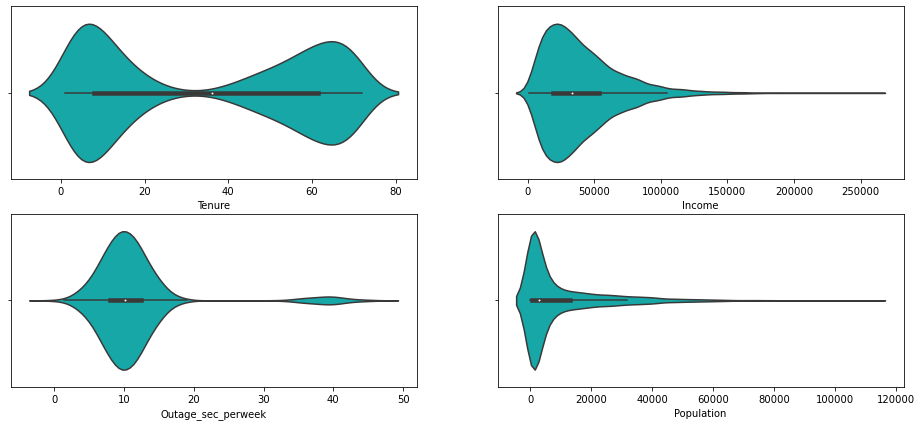

In [9]:
# Visualize violinplots plots suspected attributes with outliers

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,7))

columns = ['Tenure', 'Income', 'Outage_sec_perweek', 'Population']

for i, col in enumerate(columns):
    if i < 4:
        plt.subplot(2, 2, i+1)
        sns.violinplot(x=churn_data[col], color='c')
    else:
        plt.subplot(2, 2, i+2)
        sns.violinplot(x=churn_data[col], color='c')

plt.show()

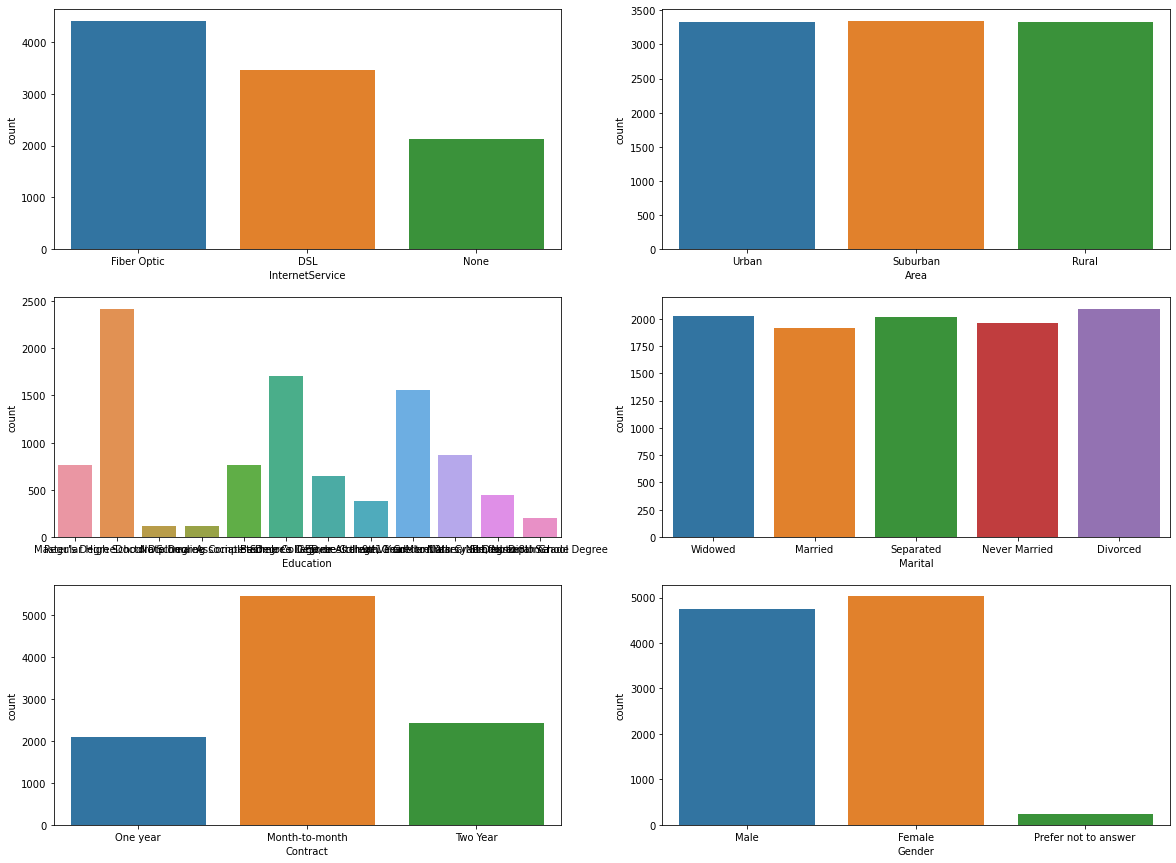

In [10]:
# Visualize bar plots for attributes variables with string values.

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,15))

columns = ['InternetService', 'Area', 'Education', 'Marital', 'Contract', 'Gender']

for i, col in enumerate(columns):
    if i < 6:
        plt.subplot(3, 2, i+1)
        sns.countplot(data=churn_data, x=col)
    else:
        plt.subplot(3, 2, i+2)
        sns.countplot(data=churn_data, x=col)

plt.show()

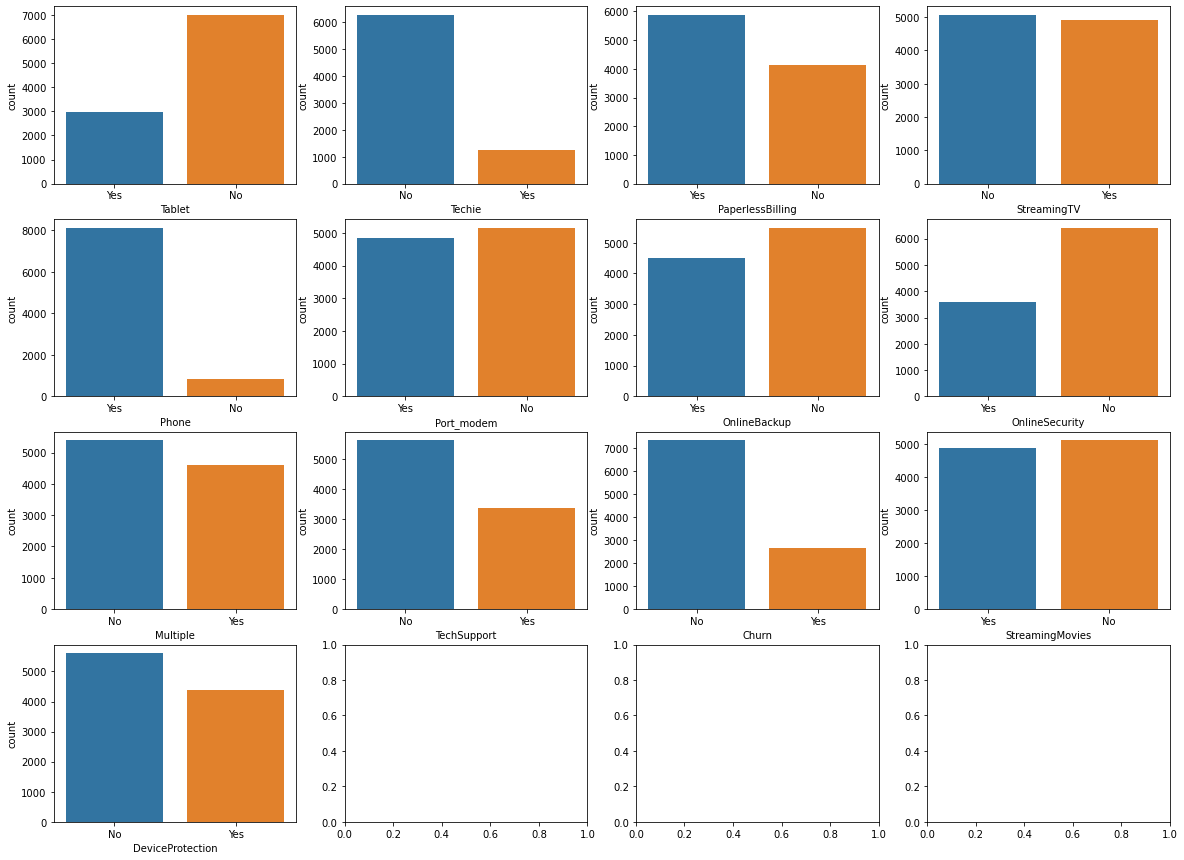

In [11]:
# Visualize bar plots for attributes variables with no/yes values. (Reference G1)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,15))

columns = ['Tablet', 'Techie', 'PaperlessBilling', 'StreamingTV', 'Phone', 'Port_modem', 'OnlineBackup', 'OnlineSecurity', 'Multiple', 'TechSupport', 'Churn', 'StreamingMovies', 'DeviceProtection']

for i, col in enumerate(columns):
    if i < 13:
        plt.subplot(4, 4, i+1)
        sns.countplot(data=churn_data, x=col)
    else:
        plt.subplot(4, 4, i+2)
        sns.countplot(data=churn_data, x=col)

plt.show()

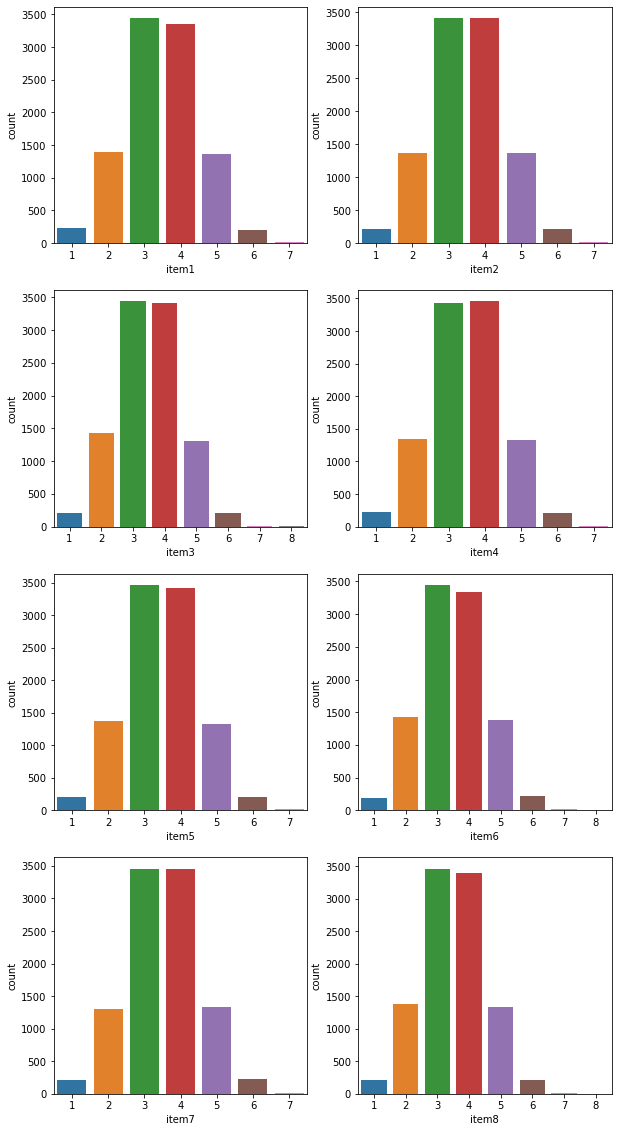

In [12]:
# Visualize bar plots for categorical attributes with numerical values.

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,20))

columns = ['item1', 'item2', 'item3', 'item4', 'item5', 'item6', 'item7', 'item8']

for i, col in enumerate(columns):
    if i < 8:
        plt.subplot(4, 2, i+1)
        sns.countplot(data=churn_data, x=col)
    else:
        plt.subplot(4, 2, i+2)
        sns.countplot(data=churn_data, x=col)

plt.show()

# 






# D 1. CLEANING FINDINGS
These are my observations from the previous process:

- Upon inspecting the dataframe, I noticed that there are two identical columns, an unnamed column and the caseorder column, that have the same values as the dataframe index. I recommend using the caseorder column as the index instead.
- No duplicated customer Ids or rows were found.
- The following columns contain missing values: TechSupport, Bandwidth_GB_Year,  Phone, Income, Tenure, Techie, Children, and Age.
- The columns with zero values include: Population, Contacts, Children, and yearly_equip_failure.
- The columns with numerous outliers are Income, Population, and Outage_sec_perweek. These variables should be normalized by calculating the standard z-score.
- All categorical variables appear to have the correct data values.



# 







# D 2. JUSTIFICATION OF MITIGATION METHODS


- In my opinion, imputing null values of Tenure, Children, Age, Income, and Bandwidth_GB_Year with their respective mean values is appropriate. This method not only provides additional data for future analysis, but also does not affect the overall mean value.

- Except for Population, the columns with zero values should be ignored as they may be actual zero values based on the nature of their data. Population should be imputed similarly to the null values.

- To potentially improve algorithm performance, I will standardize the explored columns in D1 by calculating their z scores (Larose, 2019). Afterward, I will examine associated histograms to determine standard deviations and the distance to their respective mean values.

- Based on the data dictionary, I suggest making the caseorder field the index for the dataframe. Since it is the unique identifier for customer interactions, the unnamed column can subsequently be dropped since it serves no purpose.



# D 3. SUMMARY OF THE OUTCOMES

The anticipated outcomes of the procedure are as follows:

- After imputing all identified null and zero attributes, I will  re-run above, and observe the expected non-null and non-zero values for the respective variables.

- I expect to observe  normally distributed histograms for all attributes with calcualted z scores.

- I expect to see the absence of the unnamed column and the caseorder column assigned as the new index. 




#  





# D 4. MITIGATION CODE


In [13]:
# Imputing all null attributes (Reference G7)

churn_data['Tenure'].fillna(value = churn_data['Tenure'].mean(), inplace = True)
churn_data['Bandwidth_GB_Year'].fillna(value = churn_data['Bandwidth_GB_Year'].mean(), inplace = True)
churn_data['Age'].fillna(value = churn_data['Age'].mean(), inplace = True)
churn_data['Income'].fillna(value = churn_data['Income'].mean(), inplace = True)
churn_data['Children'].fillna(value = churn_data['Children'].mean(), inplace = True) 

In [14]:
# Imputing zero values in Population attribute (Reference G8)

churn_data['Population']=churn_data['Population'].replace(0,churn_data['Population'].mean())

In [15]:
# Verifying changes in attributes

churn_data.isnull().sum(axis=0) 

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                   0
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [16]:
# Verifying change in Population attribute
    
churn_data.isin([0]).sum(axis=0)

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                1919
Age                        0
Education                  0
Employment                 0
Income                     0
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                3680
Yearly_equip_failure    6727
Techie                     0
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                      0
Multiple                   0
OnlineSecurity             0
OnlineBackup  

In [17]:
# Z-score calculation for the 3 attributes (Reference G3)

churn_data['z-score_population'] = stats.zscore(churn_data['Population']) 
churn_data['z-score_income'] = stats.zscore(churn_data['Income'], nan_policy='omit') 
churn_data['z-score_Outage_sec_perweek'] = stats.zscore(churn_data['Outage_sec_perweek'])

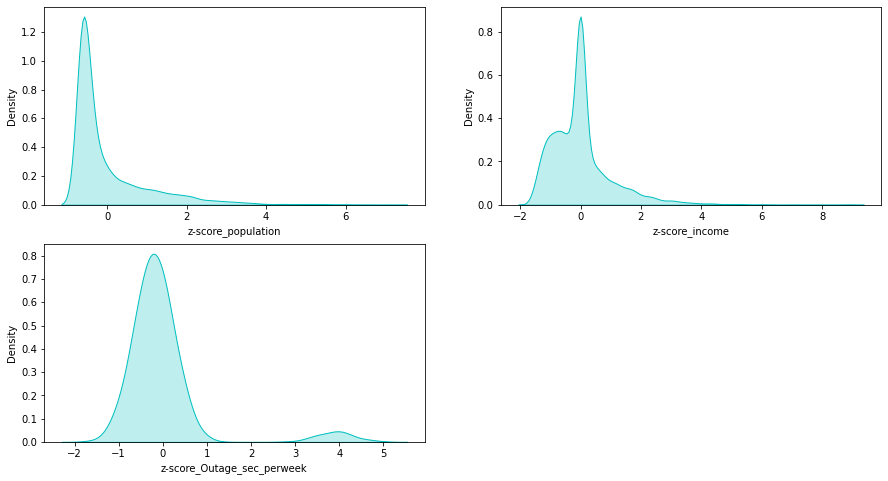

In [18]:
# Plot distrbution of Z scores in the 3 attributes

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
plt.subplot(2, 2, 1)
sns.kdeplot(churn_data['z-score_population'], color='c', fill=True);
plt.subplot(2, 2, 2)
sns.kdeplot(churn_data['z-score_income'], color='c', fill=True);
plt.subplot(2, 2, 3)
sns.kdeplot(churn_data['z-score_Outage_sec_perweek'], color='c', fill=True);
plt.subplot(2, 2, 4).set_visible(False)
plt.show();

In [19]:
# Drop unnamed column, set index to Caseorder and view head (Reference G6)

churn_data_cleaned = churn_data.loc[:, ~churn_data.columns.str.contains('^Unnamed')]
churn_data_cleaned = churn_data_cleaned.set_index('CaseOrder')
churn_data_cleaned.head()

,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,item1,item2,item3,item4,item5,item6,item7,item8,z-score_population,z-score_income,z-score_Outage_sec_perweek
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38.0,Urban,America/Sitka,Environmental health practitioner,2.095936,68.0,Master's Degree,Part Time,28561.990000,Widowed,Male,No,6.972566,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,171.449762,904.536110,5,5,5,3,4,4,3,4,-0.681489,-4.628805e-01,-0.637726
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446.0,Urban,America/Detroit,"Programmer, multimedia",1.000000,27.0,Regular High School Diploma,Retired,21704.770000,Married,Female,Yes,12.014541,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.948015,800.982766,3,4,3,3,4,3,4,4,0.041307,-7.419255e-01,0.079935
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735.0,Urban,America/Los_Angeles,Chief Financial Officer,4.000000,50.0,Regular High School Diploma,Student,39936.762226,Widowed,Female,No,10.245616,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.440398,2054.706961,4,4,2,4,4,3,3,3,-0.424747,1.184340e-15,-0.171849
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863.0,Suburban,America/Los_Angeles,Solicitor,1.000000,48.0,Doctorate Degree,Retired,18925.230000,Married,Male,No,15.206193,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,120.249493,2164.579412,4,4,4,2,5,4,3,3,0.278604,-8.550350e-01,0.534225
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352.0,Suburban,America/Chicago,Medical illustrator,0.000000,83.0,Master's Degree,Student,40074.190000,Separated,Male,Yes,8.960316,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,150.761216,271.493436,4,4,4,3,4,4,4,5,0.104225,5.592431e-03,-0.354795


# 












# D 5. CLEAN DATA

In [20]:
# Save cleaned dataframe as a CSV file (Reference G5)

churn_data_cleaned.to_csv('cleaned_churn_data.csv', index = False, encoding = 'utf-8')

#   











# D 6. LIMITATIONS 

- Firstly, i did not remove any outlier or null columns. As such i do not have any knowledge on how it would have affected the dataframe as a whole. This is something I might consider for future experiments. 

- The second limitation is that after converting the z scores I noticed the z score for Outage_sec_per_week variable are above the standard deviation threshold, therefore I suspect most of its values are outliers.


- Finally some variables still have null values.






# 







# D 7.  IMPACT OF THE LIMITATIONS

- For the first impact, the outlier and zero variables should be considered in future experiments. This is to determine if by dropping these columns it will lead to  a customer "churning".

- Secondly, there will only be influence on the experiment or research question as a whole when the Outage_sec_per_week variable or its z score is directly correlated with churn variable. 

- Finally we do not see the true picture of the sample size since there are still asignificant number of null values 

 # 
 
 
 
 
 
 
 # E 1.  PRINCIPAL COMPONENTS
 The principle components are: Population, Children, Income, Outage_sec_perweek, Email, Contacts, Yearly_equip_failure,
 MonthlyCharge, Bandwidth_GB_Year, item1, item2, item5, item3, item6, item7 and item8

In [21]:
# Create a new dataframe that includes only the numerical attributes as it would be key to the PCA model (Reference G10)

new_churn_data = churn_data_cleaned[['Population', 'Bandwidth_GB_Year', 'Income', 'Children', 'Email', 'Outage_sec_perweek', 
 'MonthlyCharge', 'Contacts', 'Yearly_equip_failure',  'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
'item7', 'item8']]

new_churn_data.head()

,Population,Bandwidth_GB_Year,Income,Children,Email,Outage_sec_perweek,MonthlyCharge,Contacts,Yearly_equip_failure,item1,item2,item3,item4,item5,item6,item7,item8
CaseOrder,,,,,,,,,,,,,,,,,
1,38.0,904.536110,28561.990000,2.095936,10,6.972566,171.449762,0,1,5,5,5,3,4,4,3,4
2,10446.0,800.982766,21704.770000,1.000000,12,12.014541,242.948015,0,1,3,4,3,3,4,3,4,4
3,3735.0,2054.706961,39936.762226,4.000000,9,10.245616,159.440398,0,1,4,4,2,4,4,3,3,3
4,13863.0,2164.579412,18925.230000,1.000000,15,15.206193,120.249493,2,0,4,4,4,2,5,4,3,3
5,11352.0,271.493436,40074.190000,0.000000,16,8.960316,150.761216,2,1,4,4,4,3,4,4,4,5


In [22]:
# Normalize this new dataframe
    
normal = (new_churn_data - new_churn_data.mean()) / new_churn_data.std()

In [23]:
# Generate a PCA model and assign a value to determine the number of components

pca = PCA(n_components = new_churn_data.shape[1])

In [24]:
# Exclude all the infinite values (Reference G9)

normal.replace([np.inf, -np.inf], np.nan, inplace=True)

In [25]:
# Perform Imputation and designation

normal.fillna(0, inplace=True)
pca.fit(normal)
df_pca = pd.DataFrame(pca.transform(normal),
columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10',
 'PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17'])

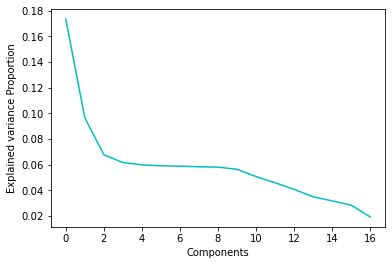

In [26]:
# Plot PCA

plt.plot(pca.explained_variance_ratio_, color="c")
plt.ylabel('Explained variance Proportion')
plt.xlabel('Components')
plt.show()

In [27]:
# Print all component loads

loads = pd.DataFrame(pca.components_.T,
columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12',
         'PC-13','PC-14','PC-15','PC-16','PC-17'],
index=new_churn_data.columns)
loads

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12,PC-13,PC-14,PC-15,PC-16,PC-17
Population,-0.001484,0.016940,-0.062636,-0.392020,-0.119344,0.073271,0.724605,0.270233,-0.378560,0.276027,-0.024143,-0.060322,0.019322,-0.016076,-0.000685,-0.007399,-0.003232
Bandwidth_GB_Year,-0.007643,0.027047,0.331611,0.227178,0.225989,-0.033636,0.505294,-0.516817,-0.109816,-0.439019,0.235750,0.024118,-0.028551,0.020509,-0.025079,0.002638,0.013445
Income,-0.000863,0.026293,0.010942,0.279939,0.229645,0.771013,0.029650,0.433112,-0.049741,-0.275144,-0.056366,0.011190,-0.059277,-0.002872,0.000582,0.011491,0.004825
Children,0.001246,0.010884,0.017081,0.454157,-0.467674,0.294155,0.251522,-0.259098,0.365737,0.468170,-0.041345,0.032632,-0.029937,-0.016046,0.015084,0.023269,-0.006642
Email,0.008542,-0.007810,-0.003750,-0.506221,-0.479666,0.182371,0.076040,-0.029274,0.448798,-0.516456,-0.006797,0.066882,-0.019568,-0.015665,0.006618,-0.016589,0.001291
Outage_sec_perweek,-0.013038,-0.043202,0.638428,-0.098146,-0.124098,0.042359,-0.162635,0.265745,0.037233,0.192429,0.644675,-0.108698,0.009942,-0.011752,-0.016573,0.010271,-0.004769
MonthlyCharge,-0.000425,-0.014964,0.684372,-0.115058,0.002783,0.028238,-0.067717,-0.045135,-0.062932,0.066725,-0.706928,0.037466,0.016800,-0.017222,0.003773,0.020134,-0.013520
Contacts,-0.008610,-0.009289,0.006875,-0.277135,0.640439,0.047319,0.186351,-0.015513,0.629990,0.273973,0.010835,0.034140,-0.035218,-0.003976,-0.026106,0.021220,-0.000451
Yearly_equip_failure,-0.007651,0.009923,0.082077,0.389566,-0.072628,-0.519813,0.285910,0.572525,0.307814,-0.216934,-0.114575,0.025313,0.005811,-0.015460,-0.000673,0.006835,-0.020907
item1,0.458902,0.281627,0.024963,0.000512,-0.002429,-0.019531,-0.007796,0.013692,0.016411,0.016969,-0.010265,-0.072428,-0.117762,-0.047401,0.023946,-0.239129,0.793131


#  






# E2. CRITERIA USED
According to the course material, the first two PCA columns have values greater than 0.3 for customer questionnaire items including item1, item2, item3, item5, item6, item7, and item8.








#  








# E 3. BENEFITS
The findings indicate that customers who participated in the survey exhibited similar views regarding several aspects, including Respectful Response, Timely response, Reliability, Timely replacements, Courteous exchange, Options, Timely fixes, and Evidence of active listening. These results can provide valuable insights for stakeholders, enabling them to make informed decisions. By focusing on the aforementioned factors, which have been identified as significant contributors to customer churn, stakeholders can make better decisions to enhance the overall customer experience. Improvements in the customer relations and experience can be made in the areas highlighted above, as these areas were all directly influenced by customer feedback in the first place.

# 



# F.  Panopto Recording

# G. SOURCES OF THIRD-PARTY CODE
1. https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn
2. https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
3. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html
4. https://www.geeksforgeeks.org/python-pandas-dataframe-isin/
5. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
6. https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe
7. https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
8. https://stackoverflow.com/questions/55319655/pandas-how-to-replace-zero-values-in-a-column-with-the-mean-of-that-column-for/56058404
9. https://scentellegher.github.io/machine-learning/2020/01/27/pca-loadings-sklearn.html
10. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# H. SOURCES

1. Bozeman R (2019, August 30). 9 Real-World Reasons Duplicate Data Is Killing Your Marketing & Sales Returns. Retrieved December 15, 2021 at https://www.impactplus.com/blog/reasons-duplicate-data-is-killing-your-marketing-and-sales-returns

2. Dancuk M (2021, July 1). Handling Missing Data in Python: Causes and Solutions. Retrieved December 15, 2021 at https://phoenixnap.com/kb/handling-missing-data-in-python

3. Ray S (2015, November 26). Simple Methods to deal with Categorical Variables in Predictive Modeling. Retrieved December 15, 2021 at https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/

4. Larose, C. D., & Larose, D. T. (2019). Data science using Python and R. John Wiley & Sons. ISBN: 978-1-119-52684-1